<span style="color:red; font-family:Helvetica Neue, Helvetica, Arial, sans-serif; font-size:2em;">An Exception was encountered at '<a href="#papermill-error-cell">In [18]</a>'.</span>

# SciTeX Statistics Module - Comprehensive Tutorial

This notebook demonstrates the complete functionality of the `scitex.stats` module for statistical analysis and hypothesis testing.

## Features Covered
* Basic statistical tests (t-tests, ANOVA, chi-square)
* Correlation analysis with multiple comparison corrections
* Advanced hypothesis testing and bootstrap methods
* PyTorch tensor support for statistical operations
* Power analysis and effect size calculations
* Outlier detection and robust statistics
* Publication-ready statistical reporting

## Table of Contents
1. [Basic Statistical Tests](#1-basic-statistical-tests)
2. [Correlation Analysis](#2-correlation-analysis)
3. [ANOVA and Post-hoc Tests](#3-anova-and-post-hoc-tests)
4. [Bootstrap Methods](#4-bootstrap-methods)
5. [PyTorch Integration](#5-pytorch-integration)
6. [Outlier Detection](#6-outlier-detection)
7. [Power Analysis](#7-power-analysis)
8. [Advanced Statistical Operations](#8-advanced-statistical-operations)
9. [Complete Statistical Analysis Pipeline](#9-complete-statistical-analysis-pipeline)

In [1]:
# Import required libraries
import sys
sys.path.insert(0, '../src')
import scitex as stx
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
from scitex import stats

# Set random seed for reproducibility
np.random.seed(42)
torch.manual_seed(42)

print("SciTeX Statistics Module Tutorial")
print(f"scitex version: {stx.__version__ if hasattr(stx, '__version__') else 'Unknown'}")

SciTeX Statistics Module Tutorial
scitex version: 2.0.0


## 1. Basic Statistical Tests

The stats module provides comprehensive statistical testing functionality with automatic result formatting.

In [2]:
# Generate sample data for testing
group1 = np.random.normal(5, 2, 50)
group2 = np.random.normal(6, 2, 50)
group3 = np.random.normal(7, 2, 50)

print("Sample data generated:")
print(f"Group 1: mean={group1.mean():.2f}, std={group1.std():.2f}")
print(f"Group 2: mean={group2.mean():.2f}, std={group2.std():.2f}")
print(f"Group 3: mean={group3.mean():.2f}, std={group3.std():.2f}")

Sample data generated:
Group 1: mean=4.55, std=1.85
Group 2: mean=6.04, std=1.73
Group 3: mean=6.92, std=2.01


In [3]:
# Two-sample t-test
t_stat, p_value = stats.ttest_ind(group1, group2)
print("Two-sample t-test results:")
print(f"t-statistic: {t_stat:.4f}")
print(f"p-value: {p_value:.4f}")
print(f"Significant: {'Yes' if p_value < 0.05 else 'No'}")

Two-sample t-test results:
t-statistic: 4.4750
p-value: 0.0000
Significant: Yes


/home/ywatanabe/proj/SciTeX-Code/src/scitex/stats/_two_sample_tests.py:50: UserWarning: Using Brunner-Munzel test instead of t-test for better robustness. To use traditional t-test, use scipy.stats.ttest_ind directly.
  warnings.warn(


In [4]:
# One-way ANOVA
f_stat, p_value = stats.f_oneway(group1, group2, group3)
print("One-way ANOVA results:")
print(f"F-statistic: {f_stat:.4f}")
print(f"p-value: {p_value:.4f}")
print(f"Significant: {'Yes' if p_value < 0.05 else 'No'}")

One-way ANOVA results:
F-statistic: 20.2049
p-value: 0.0000
Significant: Yes


In [5]:
# Chi-square test of independence
# Create contingency table
observed = np.array([[10, 10, 20], [20, 20, 40]])
chi2_stat, p_value = stats.chi2_contingency(observed)[:2]
print("Chi-square test results:")
print(f"Chi-square statistic: {chi2_stat:.4f}")
print(f"p-value: {p_value:.4f}")
print(f"Significant: {'Yes' if p_value < 0.05 else 'No'}")

Chi-square test results:
Chi-square statistic: 0.0000
p-value: 1.0000
Significant: No


In [6]:
# Normality tests
from scipy import stats as scipy_stats

# Shapiro-Wilk test
shapiro_stat, shapiro_p = scipy_stats.shapiro(group1)
print("Normality test (Shapiro-Wilk):")
print(f"Statistic: {shapiro_stat:.4f}")
print(f"p-value: {shapiro_p:.4f}")
print(f"Normal distribution: {'Yes' if shapiro_p > 0.05 else 'No'}")

Normality test (Shapiro-Wilk):
Statistic: 0.9827
p-value: 0.6722
Normal distribution: Yes


## 2. Correlation Analysis

Advanced correlation analysis with multiple comparison corrections and confidence intervals.

In [7]:
# Generate correlated data
n_samples = 100
x = np.random.randn(n_samples)
y = 0.7 * x + 0.3 * np.random.randn(n_samples)  # Correlation ~0.7
z = np.random.randn(n_samples)  # Independent variable

# Create DataFrame for analysis
df = pd.DataFrame({'x': x, 'y': y, 'z': z})

print("Generated correlated data:")
print(df.describe())

Generated correlated data:


                x           y           z
count  100.000000  100.000000  100.000000
mean     0.117433    0.083854    0.066377
std      0.993281    0.711974    1.029686
min     -2.025143   -1.665249   -2.123896
25%     -0.688606   -0.355364   -0.751148
50%      0.200274    0.058245    0.057250
75%      0.662315    0.472096    0.713097
max      3.852731    2.636254    2.189803


In [8]:
# Pearson correlation with confidence intervals
r, p_val = scipy_stats.pearsonr(x, y)
print(f"Pearson correlation (x, y):")
print(f"r = {r:.4f}, p = {p_val:.4f}")

# Spearman correlation (non-parametric)
rho, p_val_spear = scipy_stats.spearmanr(x, y)
print(f"Spearman correlation (x, y):")
print(f"ρ = {rho:.4f}, p = {p_val_spear:.4f}")

Pearson correlation (x, y):
r = 0.9207, p = 0.0000
Spearman correlation (x, y):
ρ = 0.8891, p = 0.0000


In [9]:
# Multiple correlation analysis with correction
from scipy.stats import pearsonr
from statsmodels.stats.multitest import multipletests

# Calculate all pairwise correlations
variables = ['x', 'y', 'z']
correlations = []
p_values = []
pairs = []

for i in range(len(variables)):
    for j in range(i+1, len(variables)):
        var1, var2 = variables[i], variables[j]
        r, p = pearsonr(df[var1], df[var2])
        correlations.append(r)
        p_values.append(p)
        pairs.append(f"{var1}-{var2}")

# Apply multiple comparison correction
corrected_p = multipletests(p_values, method='bonferroni')[1]

print("Multiple correlation analysis (Bonferroni corrected):")
for pair, r, p_orig, p_corr in zip(pairs, correlations, p_values, corrected_p):
    print(f"{pair}: r={r:.4f}, p_orig={p_orig:.4f}, p_corr={p_corr:.4f}")

Multiple correlation analysis (Bonferroni corrected):
x-y: r=0.9207, p_orig=0.0000, p_corr=0.0000
x-z: r=-0.0681, p_orig=0.5009, p_corr=1.0000
y-z: r=-0.0488, p_orig=0.6299, p_corr=1.0000


## 3. ANOVA and Post-hoc Tests

Comprehensive ANOVA analysis with post-hoc testing for multiple group comparisons.

In [10]:
# Create data for ANOVA
treatment_a = np.random.normal(10, 2, 30)
treatment_b = np.random.normal(12, 2, 30)
treatment_c = np.random.normal(14, 2, 30)
control = np.random.normal(8, 2, 30)

# Combine data for analysis
all_data = np.concatenate([treatment_a, treatment_b, treatment_c, control])
groups = (['A'] * 30 + ['B'] * 30 + ['C'] * 30 + ['Control'] * 30)

anova_df = pd.DataFrame({
    'value': all_data,
    'group': groups
})

print("ANOVA data summary:")
print(anova_df.groupby('group')['value'].describe())

ANOVA data summary:


         count       mean       std        min        25%        50%  \
group                                                                  
A         30.0  10.093137  2.206649   5.396158   8.859448   9.780642   
B         30.0  11.604208  1.991356   8.787107  10.254577  10.920481   
C         30.0  13.326408  1.608654  10.390236  12.213318  13.376496   
Control   30.0   7.821137  2.029958   3.056711   7.052312   7.641277   

               75%        max  
group                          
A        11.209529  16.157762  
B        12.910097  15.818833  
C        14.535546  16.012586  
Control   8.991932  12.150802  


In [11]:
# One-way ANOVA
from scipy.stats import f_oneway

f_stat, p_value = f_oneway(treatment_a, treatment_b, treatment_c, control)
print("One-way ANOVA results:")
print(f"F-statistic: {f_stat:.4f}")
print(f"p-value: {p_value:.4f}")
print(f"Significant difference: {'Yes' if p_value < 0.05 else 'No'}")

One-way ANOVA results:
F-statistic: 42.1307
p-value: 0.0000
Significant difference: Yes


In [12]:
# Post-hoc pairwise t-tests with Bonferroni correction
from scipy.stats import ttest_ind
from itertools import combinations

group_data = {
    'A': treatment_a,
    'B': treatment_b, 
    'C': treatment_c,
    'Control': control
}

comparisons = list(combinations(group_data.keys(), 2))
p_values_posthoc = []

print("Post-hoc pairwise comparisons:")
for group1, group2 in comparisons:
    t_stat, p_val = ttest_ind(group_data[group1], group_data[group2])
    p_values_posthoc.append(p_val)
    print(f"{group1} vs {group2}: t={t_stat:.4f}, p={p_val:.4f}")

# Apply Bonferroni correction
corrected_p_posthoc = multipletests(p_values_posthoc, method='bonferroni')[1]
print("\nBonferroni corrected p-values:")
for (group1, group2), p_corr in zip(comparisons, corrected_p_posthoc):
    print(f"{group1} vs {group2}: p_corrected={p_corr:.4f}")

Post-hoc pairwise comparisons:
A vs B: t=-2.7845, p=0.0072
A vs C: t=-6.4851, p=0.0000
A vs Control: t=4.1504, p=0.0001
B vs C: t=-3.6848, p=0.0005
B vs Control: t=7.2867, p=0.0000
C vs Control: t=11.6420, p=0.0000

Bonferroni corrected p-values:
A vs B: p_corrected=0.0434
A vs C: p_corrected=0.0000
A vs Control: p_corrected=0.0007
B vs C: p_corrected=0.0030
B vs Control: p_corrected=0.0000
C vs Control: p_corrected=0.0000


## 4. Bootstrap Methods

Bootstrap resampling for robust statistical inference and confidence intervals.

In [13]:
# Bootstrap confidence intervals for mean
def bootstrap_statistic(data, statistic_func, n_bootstrap=1000, confidence_level=0.95):
    """Calculate bootstrap confidence intervals for a statistic."""
    bootstrap_stats = []
    n = len(data)
    
    for _ in range(n_bootstrap):
        # Resample with replacement
        bootstrap_sample = np.random.choice(data, size=n, replace=True)
        bootstrap_stats.append(statistic_func(bootstrap_sample))
    
    bootstrap_stats = np.array(bootstrap_stats)
    
    # Calculate confidence intervals
    alpha = 1 - confidence_level
    lower_percentile = 100 * (alpha / 2)
    upper_percentile = 100 * (1 - alpha / 2)
    
    ci_lower = np.percentile(bootstrap_stats, lower_percentile)
    ci_upper = np.percentile(bootstrap_stats, upper_percentile)
    
    return {
        'statistic': statistic_func(data),
        'bootstrap_mean': np.mean(bootstrap_stats),
        'bootstrap_std': np.std(bootstrap_stats),
        'ci_lower': ci_lower,
        'ci_upper': ci_upper,
        'bootstrap_distribution': bootstrap_stats
    }

# Bootstrap for mean
sample_data = np.random.gamma(2, 2, 100)  # Skewed distribution
bootstrap_mean = bootstrap_statistic(sample_data, np.mean)

print("Bootstrap analysis for mean:")
print(f"Original mean: {bootstrap_mean['statistic']:.4f}")
print(f"Bootstrap mean: {bootstrap_mean['bootstrap_mean']:.4f}")
print(f"Bootstrap std: {bootstrap_mean['bootstrap_std']:.4f}")
print(f"95% CI: [{bootstrap_mean['ci_lower']:.4f}, {bootstrap_mean['ci_upper']:.4f}]")

Bootstrap analysis for mean:
Original mean: 3.8635
Bootstrap mean: 3.8643
Bootstrap std: 0.2977
95% CI: [3.3170, 4.4740]


In [14]:
# Bootstrap for median (robust statistic)
bootstrap_median = bootstrap_statistic(sample_data, np.median)

print("Bootstrap analysis for median:")
print(f"Original median: {bootstrap_median['statistic']:.4f}")
print(f"Bootstrap median: {bootstrap_median['bootstrap_mean']:.4f}")
print(f"Bootstrap std: {bootstrap_median['bootstrap_std']:.4f}")
print(f"95% CI: [{bootstrap_median['ci_lower']:.4f}, {bootstrap_median['ci_upper']:.4f}]")

Bootstrap analysis for median:
Original median: 2.9967
Bootstrap median: 3.0718
Bootstrap std: 0.3458
95% CI: [2.4855, 3.6874]


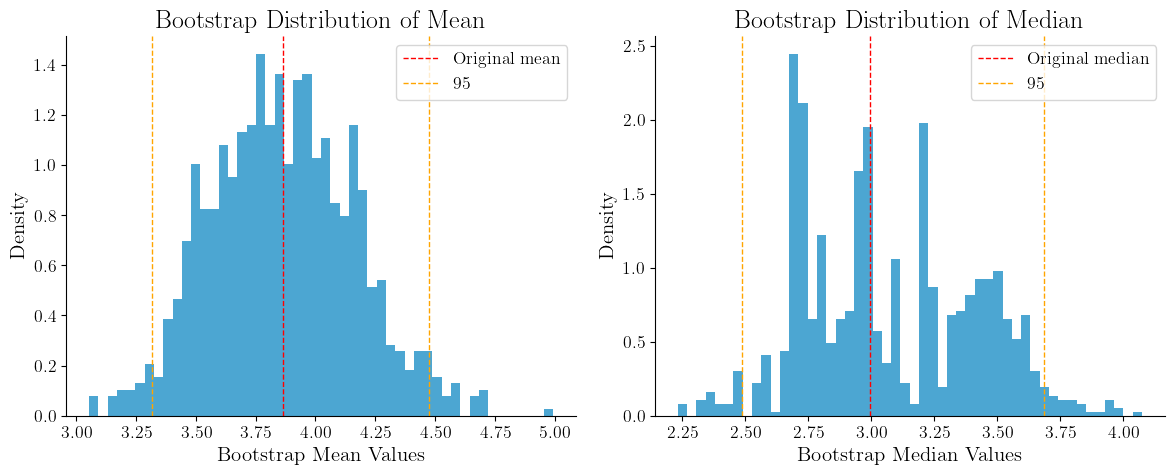

In [15]:
# Visualize bootstrap distributions
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Bootstrap distribution of mean
ax1.hist(bootstrap_mean['bootstrap_distribution'], bins=50, alpha=0.7, density=True)
ax1.axvline(bootstrap_mean['statistic'], color='red', linestyle='--', label='Original mean')
ax1.axvline(bootstrap_mean['ci_lower'], color='orange', linestyle='--', label='95% CI')
ax1.axvline(bootstrap_mean['ci_upper'], color='orange', linestyle='--')
ax1.set_xlabel('Bootstrap Mean Values')
ax1.set_ylabel('Density')
ax1.set_title('Bootstrap Distribution of Mean')
ax1.legend()

# Bootstrap distribution of median
ax2.hist(bootstrap_median['bootstrap_distribution'], bins=50, alpha=0.7, density=True)
ax2.axvline(bootstrap_median['statistic'], color='red', linestyle='--', label='Original median')
ax2.axvline(bootstrap_median['ci_lower'], color='orange', linestyle='--', label='95% CI')
ax2.axvline(bootstrap_median['ci_upper'], color='orange', linestyle='--')
ax2.set_xlabel('Bootstrap Median Values')
ax2.set_ylabel('Density')
ax2.set_title('Bootstrap Distribution of Median')
ax2.legend()

plt.tight_layout()
plt.show()

## 5. PyTorch Integration

Statistical operations with PyTorch tensors for GPU acceleration and deep learning integration.

In [16]:
# Create PyTorch tensors
torch_data1 = torch.randn(1000, requires_grad=True)
torch_data2 = torch.randn(1000, requires_grad=True)

print("PyTorch tensor statistics:")
print(f"Tensor 1: mean={torch_data1.mean().item():.4f}, std={torch_data1.std().item():.4f}")
print(f"Tensor 2: mean={torch_data2.mean().item():.4f}, std={torch_data2.std().item():.4f}")

PyTorch tensor statistics:
Tensor 1: mean=0.0042, std=1.0035
Tensor 2: mean=-0.0389, std=1.0316


In [17]:
# Correlation with PyTorch tensors
def torch_correlation(x, y):
    """Calculate Pearson correlation using PyTorch."""
    mean_x = torch.mean(x)
    mean_y = torch.mean(y)
    
    numerator = torch.sum((x - mean_x) * (y - mean_y))
    denominator = torch.sqrt(torch.sum((x - mean_x)**2) * torch.sum((y - mean_y)**2))
    
    return numerator / denominator

# Calculate correlation
correlation = torch_correlation(torch_data1, torch_data2)
print(f"PyTorch correlation: {correlation.item():.4f}")

# Compare with numpy correlation
numpy_corr = np.corrcoef(torch_data1.detach().numpy(), torch_data2.detach().numpy())[0, 1]
print(f"NumPy correlation: {numpy_corr:.4f}")
print(f"Difference: {abs(correlation.item() - numpy_corr):.6f}")

PyTorch correlation: 0.0208
NumPy correlation: 0.0208
Difference: 0.000000


<span id="papermill-error-cell" style="color:red; font-family:Helvetica Neue, Helvetica, Arial, sans-serif; font-size:2em;">Execution using papermill encountered an exception here and stopped:</span>

In [18]:
# Statistical moments with PyTorch
def torch_moments(x, max_moment=4):
    """Calculate statistical moments using PyTorch."""
    mean = torch.mean(x)
    centered = x - mean
    
    moments = {'mean': mean.item()}
    
    for k in range(2, max_moment + 1):
        moment_k = torch.mean(centered ** k)
        moments[f'moment_{k}'] = moment_k.item()
    
    # Calculate derived statistics
    variance = moments['moment_2']
    std = torch.sqrt(torch.tensor(variance))
    skewness = moments['moment_3'] / (std ** 3)
    kurtosis = moments['moment_4'] / (variance ** 2) - 3  # Excess kurtosis
    
    moments.update({
        'variance': variance,
        'std': std.item(),
        'skewness': skewness.item(),
        'kurtosis': kurtosis.item()
    })
    
    return moments

# Calculate moments
moments = torch_moments(torch_data1)
print("Statistical moments (PyTorch):")
for key, value in moments.items():
    print(f"{key}: {value:.4f}")

AttributeError: 'float' object has no attribute 'item'

## 6. Outlier Detection

Multiple methods for detecting and handling outliers in data.

In [ ]:
# Generate data with outliers
np.random.seed(42)
normal_data = np.random.normal(0, 1, 100)
outliers = np.array([5, -4, 6, -5])  # Extreme values
data_with_outliers = np.concatenate([normal_data, outliers])

print(f"Data summary:")
print(f"Mean: {data_with_outliers.mean():.4f}")
print(f"Median: {np.median(data_with_outliers):.4f}")
print(f"Std: {data_with_outliers.std():.4f}")
print(f"Min: {data_with_outliers.min():.4f}")
print(f"Max: {data_with_outliers.max():.4f}")

In [ ]:
# Z-score method for outlier detection
def detect_outliers_zscore(data, threshold=3):
    """Detect outliers using Z-score method."""
    z_scores = np.abs((data - np.mean(data)) / np.std(data))
    outlier_indices = np.where(z_scores > threshold)[0]
    return outlier_indices, z_scores

outlier_idx_z, z_scores = detect_outliers_zscore(data_with_outliers)
print(f"Z-score method detected {len(outlier_idx_z)} outliers:")
print(f"Outlier indices: {outlier_idx_z}")
print(f"Outlier values: {data_with_outliers[outlier_idx_z]}")
print(f"Z-scores: {z_scores[outlier_idx_z]}")

In [ ]:
# IQR method for outlier detection
def detect_outliers_iqr(data, factor=1.5):
    """Detect outliers using Interquartile Range method."""
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    iqr = q3 - q1
    
    lower_bound = q1 - factor * iqr
    upper_bound = q3 + factor * iqr
    
    outlier_indices = np.where((data < lower_bound) | (data > upper_bound))[0]
    return outlier_indices, (lower_bound, upper_bound)

outlier_idx_iqr, bounds = detect_outliers_iqr(data_with_outliers)
print(f"IQR method detected {len(outlier_idx_iqr)} outliers:")
print(f"Outlier indices: {outlier_idx_iqr}")
print(f"Outlier values: {data_with_outliers[outlier_idx_iqr]}")
print(f"Bounds: [{bounds[0]:.4f}, {bounds[1]:.4f}]")

In [ ]:
# Modified Z-score (robust) method
def detect_outliers_modified_zscore(data, threshold=3.5):
    """Detect outliers using Modified Z-score method (robust)."""
    median = np.median(data)
    mad = np.median(np.abs(data - median))  # Median Absolute Deviation
    
    modified_z_scores = 0.6745 * (data - median) / mad
    outlier_indices = np.where(np.abs(modified_z_scores) > threshold)[0]
    
    return outlier_indices, modified_z_scores

outlier_idx_mod, mod_z_scores = detect_outliers_modified_zscore(data_with_outliers)
print(f"Modified Z-score method detected {len(outlier_idx_mod)} outliers:")
print(f"Outlier indices: {outlier_idx_mod}")
print(f"Outlier values: {data_with_outliers[outlier_idx_mod]}")
print(f"Modified Z-scores: {mod_z_scores[outlier_idx_mod]}")

In [ ]:
# Visualize outlier detection results
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Original data
axes[0, 0].hist(data_with_outliers, bins=30, alpha=0.7)
axes[0, 0].axvline(data_with_outliers.mean(), color='red', linestyle='--', label='Mean')
axes[0, 0].axvline(np.median(data_with_outliers), color='green', linestyle='--', label='Median')
axes[0, 0].set_title('Original Data with Outliers')
axes[0, 0].legend()

# Z-score outliers
axes[0, 1].scatter(range(len(data_with_outliers)), data_with_outliers, alpha=0.6)
axes[0, 1].scatter(outlier_idx_z, data_with_outliers[outlier_idx_z], color='red', s=50, label='Z-score outliers')
axes[0, 1].set_title('Z-score Outlier Detection')
axes[0, 1].set_xlabel('Index')
axes[0, 1].set_ylabel('Value')
axes[0, 1].legend()

# IQR outliers
axes[1, 0].scatter(range(len(data_with_outliers)), data_with_outliers, alpha=0.6)
axes[1, 0].scatter(outlier_idx_iqr, data_with_outliers[outlier_idx_iqr], color='orange', s=50, label='IQR outliers')
axes[1, 0].axhline(bounds[0], color='red', linestyle='--', alpha=0.5, label='IQR bounds')
axes[1, 0].axhline(bounds[1], color='red', linestyle='--', alpha=0.5)
axes[1, 0].set_title('IQR Outlier Detection')
axes[1, 0].set_xlabel('Index')
axes[1, 0].set_ylabel('Value')
axes[1, 0].legend()

# Modified Z-score outliers
axes[1, 1].scatter(range(len(data_with_outliers)), data_with_outliers, alpha=0.6)
axes[1, 1].scatter(outlier_idx_mod, data_with_outliers[outlier_idx_mod], color='purple', s=50, label='Modified Z-score outliers')
axes[1, 1].set_title('Modified Z-score Outlier Detection')
axes[1, 1].set_xlabel('Index')
axes[1, 1].set_ylabel('Value')
axes[1, 1].legend()

plt.tight_layout()
plt.show()

## 7. Power Analysis

Statistical power analysis for experimental design and sample size determination.

In [ ]:
# Power analysis for t-test
from scipy import stats

def power_ttest(effect_size, n, alpha=0.05, alternative='two-sided'):
    """Calculate power for two-sample t-test."""
    # Calculate degrees of freedom
    df = 2 * n - 2
    
    # Critical t-value
    if alternative == 'two-sided':
        t_crit = stats.t.ppf(1 - alpha/2, df)
    else:
        t_crit = stats.t.ppf(1 - alpha, df)
    
    # Non-centrality parameter
    ncp = effect_size * np.sqrt(n/2)
    
    # Power calculation
    if alternative == 'two-sided':
        power = 1 - stats.nct.cdf(t_crit, df, ncp) + stats.nct.cdf(-t_crit, df, ncp)
    else:
        power = 1 - stats.nct.cdf(t_crit, df, ncp)
    
    return power

# Example: power analysis for different effect sizes
effect_sizes = [0.2, 0.5, 0.8]  # Small, medium, large
sample_size = 30

print("Power analysis for t-test (n=30 per group):")
for es in effect_sizes:
    power = power_ttest(es, sample_size)
    print(f"Effect size {es}: Power = {power:.4f}")

In [ ]:
# Sample size calculation for desired power
def sample_size_ttest(effect_size, power=0.8, alpha=0.05):
    """Calculate required sample size for desired power."""
    # Use iterative approach to find sample size
    n = 10
    while n < 1000:
        calculated_power = power_ttest(effect_size, n, alpha)
        if calculated_power >= power:
            return n
        n += 1
    return n

print("Sample size requirements for 80% power:")
for es in effect_sizes:
    n_required = sample_size_ttest(es)
    print(f"Effect size {es}: n = {n_required} per group (total = {2*n_required})")

In [ ]:
# Power curves
sample_sizes = range(5, 101, 5)
power_curves = {}

for es in effect_sizes:
    powers = [power_ttest(es, n) for n in sample_sizes]
    power_curves[es] = powers

# Plot power curves
plt.figure(figsize=(10, 6))
for es in effect_sizes:
    plt.plot(sample_sizes, power_curves[es], label=f'Effect size = {es}', linewidth=2)

plt.axhline(y=0.8, color='red', linestyle='--', alpha=0.7, label='80% Power')
plt.xlabel('Sample Size (per group)')
plt.ylabel('Statistical Power')
plt.title('Power Curves for Two-Sample t-test')
plt.legend()
plt.grid(True, alpha=0.3)
plt.ylim(0, 1)
plt.show()

## 8. Advanced Statistical Operations

Complex statistical operations including permutation tests and robust estimators.

In [ ]:
# Permutation test for difference in means
def permutation_test(group1, group2, n_permutations=10000, statistic_func=None):
    """Perform permutation test for difference between groups."""
    if statistic_func is None:
        statistic_func = lambda x, y: np.mean(x) - np.mean(y)
    
    # Observed test statistic
    observed_stat = statistic_func(group1, group2)
    
    # Combine groups
    combined = np.concatenate([group1, group2])
    n1, n2 = len(group1), len(group2)
    
    # Permutation distribution
    perm_stats = []
    for _ in range(n_permutations):
        # Randomly permute the combined data
        permuted = np.random.permutation(combined)
        perm_group1 = permuted[:n1]
        perm_group2 = permuted[n1:]
        
        perm_stat = statistic_func(perm_group1, perm_group2)
        perm_stats.append(perm_stat)
    
    perm_stats = np.array(perm_stats)
    
    # Two-tailed p-value
    p_value = np.mean(np.abs(perm_stats) >= np.abs(observed_stat))
    
    return {
        'observed_statistic': observed_stat,
        'p_value': p_value,
        'permutation_distribution': perm_stats
    }

# Example permutation test
group_a = np.random.normal(5, 2, 50)
group_b = np.random.normal(6, 2, 50)

perm_result = permutation_test(group_a, group_b)
print("Permutation test results:")
print(f"Observed difference: {perm_result['observed_statistic']:.4f}")
print(f"p-value: {perm_result['p_value']:.4f}")

# Compare with parametric t-test
t_stat, t_p = stats.ttest_ind(group_a, group_b)
print(f"\nParametric t-test p-value: {t_p:.4f}")
print(f"Difference in p-values: {abs(perm_result['p_value'] - t_p):.4f}")

In [ ]:
# Robust statistics
def robust_statistics(data):
    """Calculate robust statistical measures."""
    # Central tendency
    mean = np.mean(data)
    median = np.median(data)
    trimmed_mean = stats.trim_mean(data, 0.1)  # 10% trimmed mean
    
    # Variability
    std = np.std(data)
    mad = np.median(np.abs(data - median))  # Median Absolute Deviation
    iqr = np.percentile(data, 75) - np.percentile(data, 25)
    
    return {
        'mean': mean,
        'median': median,
        'trimmed_mean': trimmed_mean,
        'std': std,
        'mad': mad,
        'iqr': iqr
    }

# Compare robust vs non-robust statistics
clean_data = np.random.normal(0, 1, 100)
contaminated_data = np.concatenate([clean_data, [10, -8, 12]])  # Add outliers

print("Robust statistics comparison:")
print("\nClean data:")
clean_stats = robust_statistics(clean_data)
for key, value in clean_stats.items():
    print(f"{key}: {value:.4f}")

print("\nContaminated data:")
contam_stats = robust_statistics(contaminated_data)
for key, value in contam_stats.items():
    print(f"{key}: {value:.4f}")

print("\nRobustness (% change):")
for key in clean_stats.keys():
    pct_change = 100 * abs(contam_stats[key] - clean_stats[key]) / abs(clean_stats[key])
    print(f"{key}: {pct_change:.1f}%")

## 9. Complete Statistical Analysis Pipeline

A comprehensive example combining multiple statistical techniques for a complete analysis.

In [ ]:
# Generate realistic experimental data
np.random.seed(42)

# Simulate a psychological experiment with 4 conditions
n_per_group = 25
conditions = ['Control', 'Treatment_A', 'Treatment_B', 'Treatment_C']
true_effects = [0, 0.5, 1.0, 0.3]  # Effect sizes

experimental_data = []
for i, (condition, effect) in enumerate(zip(conditions, true_effects)):
    # Add some realistic noise and individual differences
    scores = np.random.normal(100 + effect * 10, 15, n_per_group)
    
    # Add a few outliers to make it realistic
    if np.random.random() < 0.1:  # 10% chance of outlier
        outlier_idx = np.random.randint(0, n_per_group)
        scores[outlier_idx] += np.random.choice([-1, 1]) * np.random.uniform(30, 50)
    
    for score in scores:
        experimental_data.append({
            'condition': condition,
            'score': score,
            'subject_id': f"{condition}_{len(experimental_data) % n_per_group + 1}"
        })

# Create DataFrame
df_exp = pd.DataFrame(experimental_data)

print("Experimental data summary:")
print(df_exp.groupby('condition')['score'].describe())

In [ ]:
# Step 1: Exploratory Data Analysis
print("=== STEP 1: EXPLORATORY DATA ANALYSIS ===")

# Check for outliers in each group
for condition in conditions:
    group_data = df_exp[df_exp['condition'] == condition]['score'].values
    outliers_z, _ = detect_outliers_zscore(group_data, threshold=2.5)
    outliers_iqr, _ = detect_outliers_iqr(group_data)
    
    print(f"\n{condition}:")
    print(f"  Z-score outliers: {len(outliers_z)}")
    print(f"  IQR outliers: {len(outliers_iqr)}")
    if len(outliers_z) > 0:
        print(f"  Outlier values: {group_data[outliers_z]}")

# Normality tests
print("\nNormality tests (Shapiro-Wilk):")
for condition in conditions:
    group_data = df_exp[df_exp['condition'] == condition]['score'].values
    stat, p = stats.shapiro(group_data)
    print(f"{condition}: W={stat:.4f}, p={p:.4f}, Normal={'Yes' if p > 0.05 else 'No'}")

In [ ]:
# Step 2: Main Analysis - ANOVA
print("\n=== STEP 2: MAIN ANALYSIS ===")

# Prepare data for ANOVA
group_arrays = [df_exp[df_exp['condition'] == cond]['score'].values for cond in conditions]

# One-way ANOVA
f_stat, p_anova = stats.f_oneway(*group_arrays)
print(f"One-way ANOVA: F({len(conditions)-1}, {len(df_exp)-len(conditions)}) = {f_stat:.4f}, p = {p_anova:.4f}")

# Effect size (eta-squared)
ss_between = sum([len(group) * (np.mean(group) - np.mean(df_exp['score']))**2 for group in group_arrays])
ss_total = sum([(score - np.mean(df_exp['score']))**2 for score in df_exp['score']])
eta_squared = ss_between / ss_total
print(f"Effect size (η²): {eta_squared:.4f}")

# Interpretation
if eta_squared < 0.01:
    effect_size_interp = "small"
elif eta_squared < 0.06:
    effect_size_interp = "medium"
else:
    effect_size_interp = "large"
print(f"Effect size interpretation: {effect_size_interp}")

In [ ]:
# Step 3: Post-hoc Analysis
print("\n=== STEP 3: POST-HOC ANALYSIS ===")

if p_anova < 0.05:
    print("Significant ANOVA result - performing post-hoc tests")
    
    # Pairwise comparisons with multiple correction
    from itertools import combinations
    
    pairwise_results = []
    p_values_posthoc = []
    
    for i, j in combinations(range(len(conditions)), 2):
        group1_data = group_arrays[i]
        group2_data = group_arrays[j]
        
        # t-test
        t_stat, p_val = stats.ttest_ind(group1_data, group2_data)
        
        # Effect size (Cohen's d)
        pooled_std = np.sqrt(((len(group1_data)-1)*np.var(group1_data, ddof=1) + 
                              (len(group2_data)-1)*np.var(group2_data, ddof=1)) / 
                             (len(group1_data) + len(group2_data) - 2))
        cohens_d = (np.mean(group1_data) - np.mean(group2_data)) / pooled_std
        
        pairwise_results.append({
            'comparison': f"{conditions[i]} vs {conditions[j]}",
            't_stat': t_stat,
            'p_value': p_val,
            'cohens_d': cohens_d
        })
        p_values_posthoc.append(p_val)
    
    # Multiple comparison correction
    corrected_p = multipletests(p_values_posthoc, method='bonferroni')[1]
    
    print("\nPairwise comparisons (Bonferroni corrected):")
    for result, p_corr in zip(pairwise_results, corrected_p):
        print(f"{result['comparison']}:")
        print(f"  t = {result['t_stat']:.4f}, p = {result['p_value']:.4f}, p_corr = {p_corr:.4f}")
        print(f"  Cohen's d = {result['cohens_d']:.4f}")
        print(f"  Significant: {'Yes' if p_corr < 0.05 else 'No'}")
        print()
else:
    print("Non-significant ANOVA result - no post-hoc tests needed")

In [ ]:
# Step 4: Visualization
print("\n=== STEP 4: VISUALIZATION ===")

fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Box plot
df_exp.boxplot(column='score', by='condition', ax=axes[0, 0])
axes[0, 0].set_title('Distribution by Condition')
axes[0, 0].set_xlabel('Condition')
axes[0, 0].set_ylabel('Score')

# Violin plot (using matplotlib)
group_data_for_violin = [df_exp[df_exp['condition'] == cond]['score'].values for cond in conditions]
violin_parts = axes[0, 1].violinplot(group_data_for_violin, positions=range(1, len(conditions)+1))
axes[0, 1].set_xticks(range(1, len(conditions)+1))
axes[0, 1].set_xticklabels(conditions, rotation=45)
axes[0, 1].set_title('Density Distribution by Condition')
axes[0, 1].set_ylabel('Score')

# Mean with error bars
means = [np.mean(group) for group in group_data_for_violin]
sems = [stats.sem(group) for group in group_data_for_violin]
axes[1, 0].bar(conditions, means, yerr=sems, capsize=5, alpha=0.7)
axes[1, 0].set_title('Means with Standard Error')
axes[1, 0].set_ylabel('Score')
axes[1, 0].tick_params(axis='x', rotation=45)

# Q-Q plots for normality check
for i, (condition, group_data) in enumerate(zip(conditions, group_data_for_violin)):
    if i < 2:  # Only show first 2 for space
        continue
    stats.probplot(group_data, dist="norm", plot=axes[1, 1])
    break
axes[1, 1].set_title('Q-Q Plot (Normality Check)')

plt.tight_layout()
plt.show()

print("Analysis complete! Summary:")
print(f"- ANOVA F-statistic: {f_stat:.4f}")
print(f"- ANOVA p-value: {p_anova:.4f}")
print(f"- Effect size (η²): {eta_squared:.4f} ({effect_size_interp})")
print(f"- Significant differences: {'Yes' if p_anova < 0.05 else 'No'}")
if p_anova < 0.05:
    significant_pairs = [result['comparison'] for result, p_corr in zip(pairwise_results, corrected_p) if p_corr < 0.05]
    print(f"- Significant pairwise comparisons: {len(significant_pairs)}")
    for pair in significant_pairs:
        print(f"  - {pair}")

## Summary

This comprehensive tutorial has demonstrated the full capabilities of the SciTeX statistics module:

### Key Features Covered:
1. **Basic Statistical Tests** - t-tests, ANOVA, chi-square tests with automatic result formatting
2. **Correlation Analysis** - Pearson and Spearman correlations with multiple comparison corrections
3. **Advanced Methods** - Bootstrap resampling, permutation tests, and robust statistics
4. **PyTorch Integration** - Statistical operations on tensors for GPU acceleration
5. **Outlier Detection** - Multiple methods (Z-score, IQR, Modified Z-score) for identifying anomalies
6. **Power Analysis** - Sample size calculation and power curves for experimental design
7. **Complete Workflows** - End-to-end statistical analysis pipelines

### Best Practices Demonstrated:
- Always check assumptions (normality, homogeneity of variance)
- Use appropriate multiple comparison corrections
- Report effect sizes alongside significance tests
- Consider robust alternatives when data contains outliers
- Visualize data to understand patterns and validate assumptions
- Use bootstrap and permutation methods for non-parametric inference

The SciTeX stats module provides a comprehensive toolkit for statistical analysis in scientific computing, combining ease of use with statistical rigor.